In [1]:
import sys
sys.path.insert(1, 'C://Users//arthu//git//eyenes//eyenes')
from gen_class import Generation
import pickle
import numpy as np
import subprocess
import time
from IPython.display import clear_output
import ipyparallel as ipp

Using TensorFlow backend.


In [2]:
mode = 'sequential'
hyper_params = {'size': 64, 'num_survivors': 32, 'rom_id': 'SuperMarioBros-v1',
                'mode': mode, 'path_name': 'C://Users//arthu//git//eyenes//eyenes',
                'fps': 5, 'buffer': 2, 'actions': ['load']}

In [3]:
generation = Generation(**hyper_params)

In [4]:
generation.agents[0].model.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (1, 240, 256, 2)          0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (1, 256, 256, 2)          0         
_________________________________________________________________
average_pooling2d_1 (Average (1, 128, 128, 2)          0         
_________________________________________________________________
separable_conv2d_1 (Separabl (1, 32, 32, 4)            44        
_________________________________________________________________
conv2d_1 (Conv2D)            (1, 16, 16, 8)            2056      
_________________________________________________________________
conv2d_2 (Conv2D)            (1, 8, 8, 16)             2064      
_________________________________________________________________
conv2d_3 (Conv2D)            (1, 4, 4, 32)            

In [6]:
if mode == 'parallel':
    generation.start_engines()

    # Workaround for custom module import
    dview = ipp.Client()[:]
    @dview.remote(block=True)
    def remote_add(path_name):
        import sys
        sys.path.insert(1, path_name)
        return path_name    
    remote_add(generation.path_name)

    generation.remote_import()

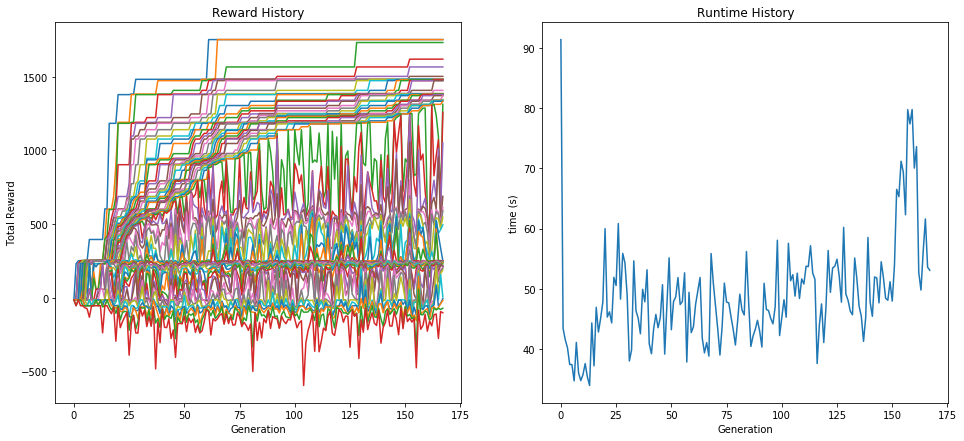

In [ ]:
for i in range(1000):
    generation.evolution_step(plot = True, monitor = True)
    generation.save_generation()